# Part A: Conceptual Questions

### 1. What is a Decision Tree and how does it make decisions?
A Decision Tree is a supervised machine learning algorithm that makes decisions by
recursively splitting the dataset based on feature values. Each internal node represents
a decision rule, each branch represents an outcome of the rule, and each leaf node
represents a final class prediction.

---

### 2. What does a split criterion mean in a Decision Tree?
A split criterion is a mathematical measure used to decide **which feature and threshold**
should be used to split the data at each node. It helps determine the best split that
separates classes effectively.

---

### 3. Difference between Gini Impurity and Entropy
- **Gini Impurity** measures how often a randomly chosen element would be incorrectly labeled.
- **Entropy** measures the amount of uncertainty or disorder in the dataset.
- Gini is computationally faster, while Entropy is more information-theoretic.

---

### 4. Why do Decision Trees tend to overfit?
Decision Trees can grow very deep and learn noise in the training data, creating highly
specific rules that do not generalize well to unseen data.

---

### 5. What role does the max_depth parameter play?
`max_depth` controls the maximum depth of the tree.
- Smaller depth → simpler model (less overfitting)
- Larger depth → complex model (higher risk of overfitting)


# Part B: Data Exploration

In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\sande\Downloads\archive (6)\heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
print("Shape:", df.shape)

Shape: (1025, 14)


In [5]:
print("\nColumns:\n", df.columns)


Columns:
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [6]:
# Target & Features
target_column = "target"
feature_columns = df.drop(columns=target_column).columns

print("Target column:", target_column)
print("Feature columns:", list(feature_columns))

Target column: target
Feature columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [7]:
# Missing values
print("\nMissing Values:\n", df.isnull().sum())

# Data types
print("\nData Types:\n", df.dtypes)


Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data Types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


# Part C: Data Preprocessing

In [8]:
from sklearn.model_selection import train_test_split
# No missing values in this dataset (checked above)
# Separate features and target
X = df.drop(columns="target")
y = df["target"]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (820, 13)
Testing set: (205, 13)


# Part D: Model Building

In [9]:
from sklearn.tree import DecisionTreeClassifier
# Create model
dt_model = DecisionTreeClassifier(
    criterion="gini",
    random_state=42
)
# Train model
dt_model.fit(X_train, y_train)
# Predictions
y_pred = dt_model.predict(X_test)

# Part E: Model Evaluation

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9853658536585366

Confusion Matrix:
 [[102   0]
 [  3 100]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### Evaluation Insights
- The class with higher precision and recall is predicted better.
- If training accuracy is much higher than testing accuracy, the model is **overfitting**.

## Part F: Understanding Tree Depth (Manual Experiment)

In [12]:
depths = [2, 5, None]
results = []

for depth in depths:
    model = DecisionTreeClassifier(
        criterion="gini",
        max_depth=depth,
        random_state=42
    )
    model.fit(X_train, y_train)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    results.append((depth, train_acc, test_acc))

results_df = pd.DataFrame(
    results, columns=["max_depth", "Train Accuracy", "Test Accuracy"]
)
results_df

,max_depth,Train Accuracy,Test Accuracy
0,2.0,0.769512,0.678049
1,5.0,0.929268,0.843902
2,NaN,1.000000,0.985366


### Observations
- **Very shallow tree (depth=2):** Underfits the data
- **Very deep tree (depth=None):** Overfits (high train accuracy, lower test accuracy)
- **Optimal depth (depth=5):** Best balance between bias and variance

## Part G: Tree Visualization

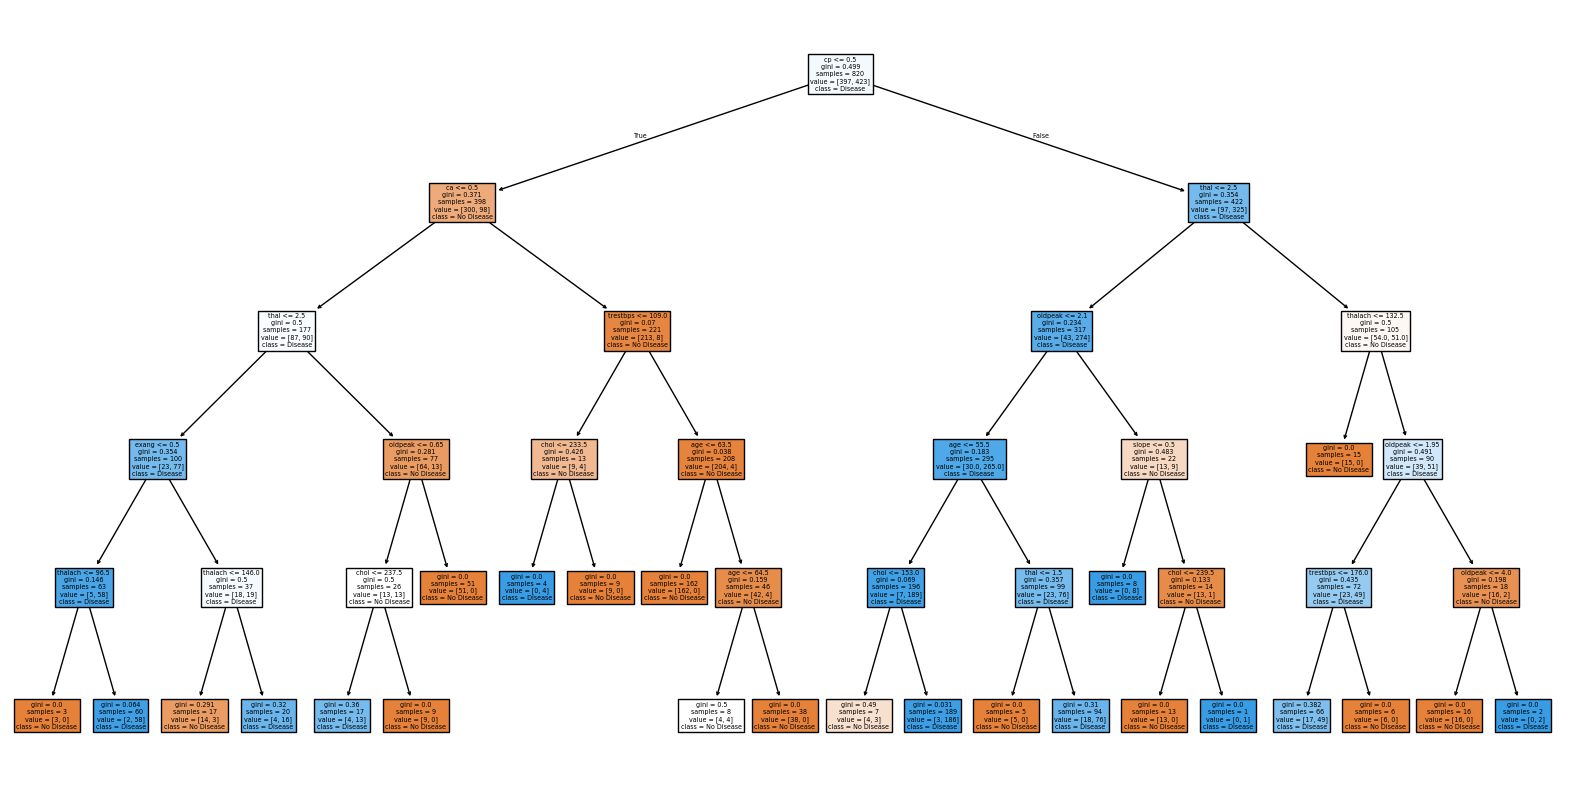

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

best_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    random_state=42
)
best_model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True
)
plt.show()

## Part H: Reflection Questions

### 1. Why are Decision Trees suitable for medical datasets?
They are interpretable, handle non-linear relationships well, and allow domain experts
to understand decision rules.

---

### 2. What makes Decision Trees easy to interpret?
Their rule-based structure allows predictions to be explained using simple IF–ELSE logic.

---

### 3. Why are Decision Trees commonly used in ensemble methods?
They are weak learners individually but perform exceptionally well when combined
(e.g., Random Forest, Gradient Boosting).


## Finally Check with these below parameter
    - Compare criterion='gini' vs criterion='entropy'
    - Try min_samples_leaf manually
    - Write a short conclusion
    - Proper markdown explanations required


## Compare Gini vs Entropy

In [15]:
for criterion in ["gini", "entropy"]:
    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=5,
        random_state=42
    )
    model.fit(X_train, y_train)
    print(f"{criterion.upper()} Test Accuracy:", model.score(X_test, y_test))


GINI Test Accuracy: 0.8439024390243902
ENTROPY Test Accuracy: 0.8439024390243902


## Try min_samples_leaf

In [16]:
model_leaf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=10,
    random_state=42
)
model_leaf.fit(X_train, y_train)

print("Accuracy with min_samples_leaf:",
      model_leaf.score(X_test, y_test))


Accuracy with min_samples_leaf: 0.8195121951219512


## Final Conclusion

## Conclusion
Decision Trees are powerful, interpretable models suitable for structured datasets.
However, they are prone to overfitting if not controlled using hyperparameters such as
`max_depth` and `min_samples_leaf`. Proper tuning improves generalization and makes
Decision Trees reliable building blocks for ensemble models.